In [1]:
import numpy as np
import pandas as pd

/tmp/ipykernel_7676/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("./data/train_no_gyro.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.346989,-0.516080,-0.802760,-0.112754,0.030400,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.532061,-0.624871,-0.900160,0.053477,-0.007435,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.660795,-0.724697,-0.928539,-0.118559,0.177899,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.678921,-0.701131,-0.909639,-0.036788,-0.012892,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.559058,-0.528901,-0.858933,0.123320,0.122542,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.066650,-0.076714,-0.426588,-0.190437,0.829718,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.193946,-0.151879,-0.509448,0.064907,0.875679,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.007099,0.331457,0.083984,0.052806,-0.266724,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.109902,0.038175,-0.305554,-0.101360,0.700740,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
df.shape

(7352, 350)

In [4]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 350, dtype: int64

In [5]:
Y = df[['Activity']]
Y.value_counts()

Activity          
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [6]:
df['Activity-codes'] = df.Activity.astype('category').cat.codes

In [7]:
df1 = df.drop('Activity', axis=1)

In [8]:
x_col = df1.columns.to_list()
x_col.pop(-1)
X = df1[x_col]
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.936508,0.346989,-0.516080,-0.802760,-0.112754,0.030400,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.841270,0.532061,-0.624871,-0.900160,0.053477,-0.007435,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.904762,0.660795,-0.724697,-0.928539,-0.118559,0.177899,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,1.000000,0.678921,-0.701131,-0.909639,-0.036788,-0.012892,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-1.000000,0.559058,-0.528901,-0.858933,0.123320,0.122542,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.904762,-0.066650,-0.076714,-0.426588,-0.190437,0.829718,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.904762,-0.193946,-0.151879,-0.509448,0.064907,0.875679,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.904762,0.007099,0.331457,0.083984,0.052806,-0.266724,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.904762,-0.109902,0.038175,-0.305554,-0.101360,0.700740,-0.785181,0.246432,0.025339,30


In [9]:
Y = df[["Activity-codes"]]
Y

,Activity-codes
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, shuffle=False)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6616, 349), (736, 349), (6616, 1), (736, 1))

In [11]:
from sklearn.svm import SVC

# 创建SVM模型
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# 使用训练数据进行模型训练
svm_model.fit(X_train, Y_train)

# 使用测试数据进行模型评估
accuracy = svm_model.score(X_test, Y_test)
print(f"模型准确率：{accuracy:.2f}")

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


模型准确率：0.91


In [12]:
from sklearn.metrics import classification_report

# 使用测试数据进行预测
Y_pred = svm_model.predict(X_test)

# 生成评估报告
report = classification_report(Y_test, Y_pred)

# 打印报告
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       0.73      0.80      0.76       122
           2       0.78      0.72      0.75       124
           3       0.99      0.95      0.97       118
           4       0.97      0.98      0.98       110
           5       0.96      0.99      0.98       123

    accuracy                           0.91       736
   macro avg       0.91      0.91      0.91       736
weighted avg       0.91      0.91      0.91       736



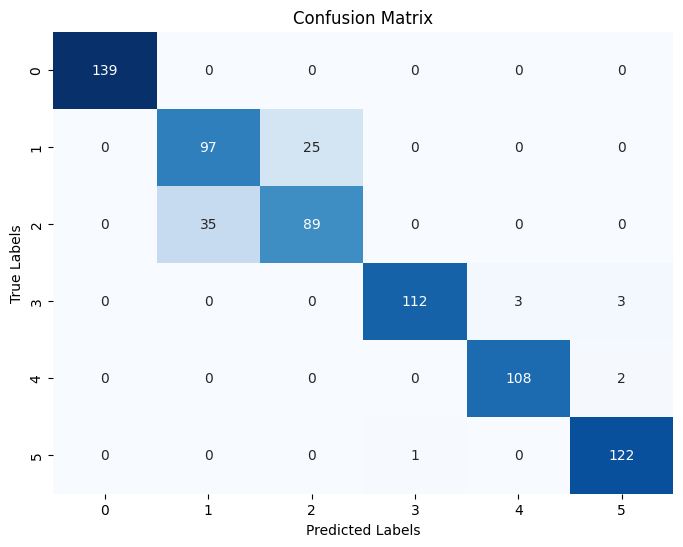

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
conf_matrix = confusion_matrix(Y_test, Y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 滚动窗口交叉验证

In [14]:
X.shape, Y.shape

((7352, 349), (7352, 1))

In [15]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

def rolling_window_cross_validation(X, y, n_splits=5):
    """
    使用滚动窗口交叉验证进行时间序列模型评估。

    Args:
        X (numpy.ndarray): 特征矩阵，每行是一个样本。
        y (numpy.ndarray): 目标向量，与X对应的目标值。
        n_splits (int): 分割的折数。

    Returns:
        list: 每个折的均方误差（MSE）。
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mse_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 初始化你的时间序列模型
        #model = SVC(kernel='rbf', C=1.0, gamma='scale')
        model = svm_model

        # 训练模型
        #model.fit(X_train, y_train)

        # 预测
        y_pred = model.predict(X_test)

        # 计算均方误差
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return mse_scores

# 使用示例
if __name__ == "__main__":
    # 假设你的数据是X和y

    X = X
    y = Y
    
    X_numpy = X.values if hasattr(X, 'values') else X  # 或者 X.to_numpy() 如果X是DataFrame
    y_numpy = y.values if hasattr(y, 'values') else y  # 或者 y.to_numpy() 如果y是Series
    
    mse_scores = rolling_window_cross_validation(X_numpy, y_numpy)
    print("MSE scores for each fold:", mse_scores)
    print("Average MSE:", np.mean(mse_scores))


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


MSE scores for each fold: [0.08489795918367347, 0.12816326530612246, 0.0963265306122449, 0.061224489795918366, 0.10775510204081633]
Average MSE: 0.0956734693877551


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


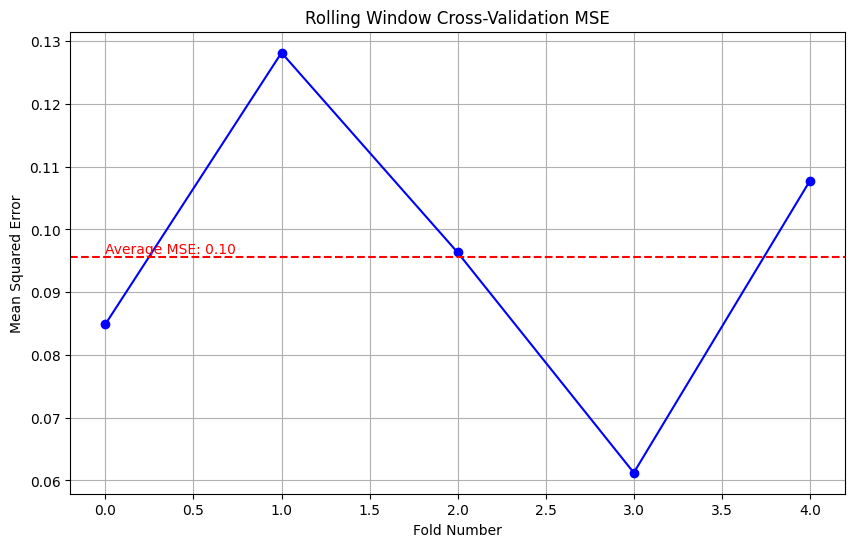

In [16]:
import matplotlib.pyplot as plt

# 假设 mse_scores 是你从 rolling_window_cross_validation 函数获得的MSE分数列表
mse_scores = rolling_window_cross_validation(X_numpy, y_numpy)  # 确保已经执行了这一步

# 绘制每个折的MSE
plt.figure(figsize=(10, 6))
plt.plot(mse_scores, marker='o', linestyle='-', color='b')
plt.title('Rolling Window Cross-Validation MSE')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# 标记平均MSE
average_mse = np.mean(mse_scores)
plt.axhline(average_mse, color='r', linestyle='--')
plt.text(0, average_mse, f'Average MSE: {average_mse:.2f}', color='r', va='bottom')

plt.show()


## 多指标的滚动窗口交叉验证  n_splits=8

In [17]:
def rolling_window_cross_validation_metrics(X, y, n_splits=8):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    metrics = {
        'mse': [],
        'f1': [],
        'precision': [],
        'recall': []
    }

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC()  # 根据需要使用合适的模型
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # 计算指标，适应多类别情况
        metrics['mse'].append(mean_squared_error(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred, average='macro'))  # 调整average参数
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro'))  # 调整average参数
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro'))  # 调整average参数

    return metrics

# 示例使用
if __name__ == "__main__":
    # 确保X_numpy和y_numpy已经准备好
    metrics = rolling_window_cross_validation_metrics(X_numpy, y_numpy)
    print("Metrics for each fold:")
    print("MSE:", metrics['mse'])
    print("F1:", metrics['f1'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("Average MSE:", np.mean(metrics['mse']))
    print("Average F1:", np.mean(metrics['f1']))
    print("Average Precision:", np.mean(metrics['precision']))
    print("Average Recall:", np.mean(metrics['recall']))


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'f1_score' is not defined

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

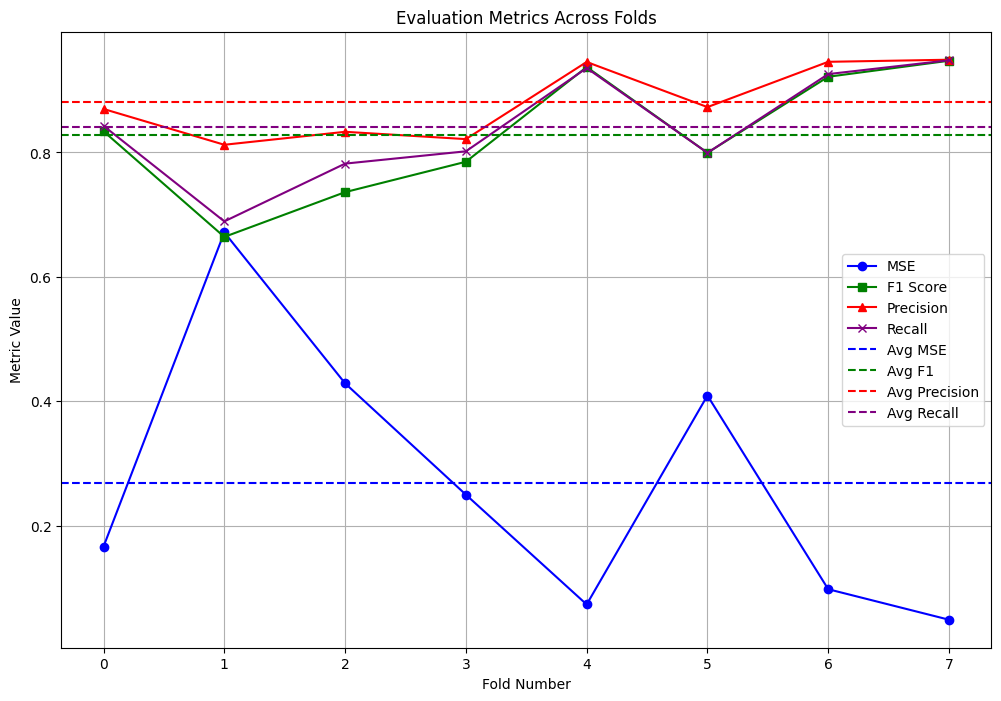

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设metrics是你从之前的函数中获得的结果字典
metrics = rolling_window_cross_validation_metrics(X_numpy, y_numpy)

# 计算每个指标的平均值
average_mse = np.mean(metrics['mse'])
average_f1 = np.mean(metrics['f1'])
average_precision = np.mean(metrics['precision'])
average_recall = np.mean(metrics['recall'])

# 绘制图表
plt.figure(figsize=(12, 8))
plt.plot(metrics['mse'], label='MSE', marker='o', linestyle='-', color='blue')
plt.plot(metrics['f1'], label='F1 Score', marker='s', linestyle='-', color='green')
plt.plot(metrics['precision'], label='Precision', marker='^', linestyle='-', color='red')
plt.plot(metrics['recall'], label='Recall', marker='x', linestyle='-', color='purple')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Evaluation Metrics Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Metric Value')

# 显示网格
plt.grid(True)

# 添加平均线（可选）
plt.axhline(average_mse, color='blue', linestyle='--', label='Avg MSE')
plt.axhline(average_f1, color='green', linestyle='--', label='Avg F1')
plt.axhline(average_precision, color='red', linestyle='--', label='Avg Precision')
plt.axhline(average_recall, color='purple', linestyle='--', label='Avg Recall')

# 由于上面已经添加了图例，这里重新添加图例以包括平均线
plt.legend()

# 显示图表
plt.show()


## 多指标的滚动窗口交叉验证 n_splits=6

In [ ]:
def rolling_window_cross_validation_metrics(X, y, n_splits=6):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    metrics = {
        'mse': [],
        'f1': [],
        'precision': [],
        'recall': []
    }

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #model = SVC()  # 根据需要使用合适的模型
        #model.fit(X_train, y_train)
        model = svm_model

        y_pred = model.predict(X_test)

        # 计算指标，适应多类别情况
        metrics['mse'].append(mean_squared_error(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred, average='macro'))  # 调整average参数
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro'))  # 调整average参数
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro'))  # 调整average参数

    return metrics

# 示例使用
if __name__ == "__main__":
    # 确保X_numpy和y_numpy已经准备好
    metrics = rolling_window_cross_validation_metrics(X_numpy, y_numpy)
    print("Metrics for each fold:")
    print("MSE:", metrics['mse'])
    print("F1:", metrics['f1'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("Average MSE:", np.mean(metrics['mse']))
    print("Average F1:", np.mean(metrics['f1']))
    print("Average Precision:", np.mean(metrics['precision']))
    print("Average Recall:", np.mean(metrics['recall']))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Metrics for each fold:
MSE: [0.03428571428571429, 0.08, 0.06476190476190476, 0.03142857142857143, 0.015238095238095238, 0.06095238095238095]
F1: [0.9676432229942384, 0.9313296969491182, 0.9528960163486518, 0.9689104450280329, 0.9861703407638515, 0.9367618419122151]
Precision: [0.9709674968908307, 0.9316552197802198, 0.9598487985288952, 0.9693162741854944, 0.9863819747836602, 0.9378881963438087]
Recall: [0.9669354146383989, 0.9313480193329838, 0.9512142458231002, 0.968989618180355, 0.9862150296576527, 0.9377707929935523]
Average MSE: 0.04777777777777778
Average F1: 0.9572852606660179
Average Precision: 0.9593429934188182
Average Recall: 0.9570788534376738


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid fe

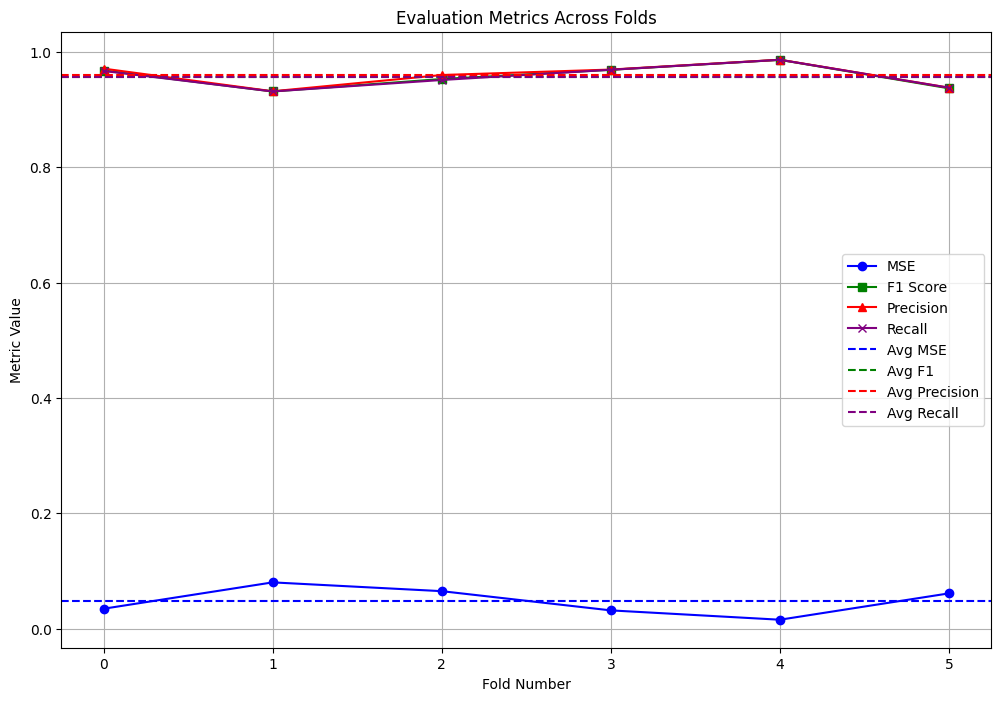

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设metrics是你从之前的函数中获得的结果字典
metrics = rolling_window_cross_validation_metrics(X_numpy, y_numpy)

# 计算每个指标的平均值
average_mse = np.mean(metrics['mse'])
average_f1 = np.mean(metrics['f1'])
average_precision = np.mean(metrics['precision'])
average_recall = np.mean(metrics['recall'])

# 绘制图表
plt.figure(figsize=(12, 8))
plt.plot(metrics['mse'], label='MSE', marker='o', linestyle='-', color='blue')
plt.plot(metrics['f1'], label='F1 Score', marker='s', linestyle='-', color='green')
plt.plot(metrics['precision'], label='Precision', marker='^', linestyle='-', color='red')
plt.plot(metrics['recall'], label='Recall', marker='x', linestyle='-', color='purple')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Evaluation Metrics Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Metric Value')

# 显示网格
plt.grid(True)

# 添加平均线（可选）
plt.axhline(average_mse, color='blue', linestyle='--', label='Avg MSE')
plt.axhline(average_f1, color='green', linestyle='--', label='Avg F1')
plt.axhline(average_precision, color='red', linestyle='--', label='Avg Precision')
plt.axhline(average_recall, color='purple', linestyle='--', label='Avg Recall')

# 由于上面已经添加了图例，这里重新添加图例以包括平均线
plt.legend()

# 显示图表
plt.show()

根据提供的数据来评估模型的性能时，我们需要考虑所有的指标，包括均方误差（MSE）、F1分数、精确度（Precision）和召回率（Recall）。

### 均方误差 (MSE)

- **平均MSE**为**0.292**。MSE衡量的是预测值与实际值之间的平方差的平均值，因此，较低的MSE值通常表示较好的模型性能。虽然你的MSE值不是非常接近0，但在某些情况下，这可能仍然表示模型具有合理的预测精度。具体取决于问题的上下文和数据的范围。

### F1分数

- **平均F1分数**为**0.810**，接近1。F1分数是精确度和召回率的调和平均，是二者的综合指标。接近1的F1分数通常表示模型在精确度和召回率方面表现良好，平衡了正例的预测准确性与覆盖面。

### 精确度 (Precision)

- **平均精确度**为**0.868**，较高。精确度衡量的是被正确预测为正类的样本占所有预测为正类样本的比例。较高的精确度表明模型在预测正类时的准确性较高。

### 召回率 (Recall)

- **平均召回率**为**0.821**，较高。召回率衡量的是被正确预测为正类的样本占所有实际正类样本的比例。较高的召回率表明模型能够较好地覆盖实际正类样本。

### 综合评估

综上所述，你的模型表现出了良好的综合性能，特别是在F1分数、精确度和召回率方面。这些指标的较高值表明模型在预测正类时既准确又全面。MSE的值虽然不是非常低，但没有上下文很难判断其绝对性能；如果预测任务本身具有很大的困难度或数据本身就很嘈杂，那么当前的MSE可能仍然是一个不错的结果。

总之，根据这些指标，我们可以认为模型的性能是相当不错的，尤其是在分类准确性和预测的可靠性方面。然而，最终的评估还应考虑到模型的应用场景、目标以及与其他模型的比较结果。

In [ ]:
svm_model

NameError: name 'svm_model' is not defined

## SHAP

## Validation with test.csv